# Experimental Design, Model Evaluation, and Grid Search

Following (mostly) Python Machine Learning 3rd (Raschka) Chapter 6

## Agenda

- Variability in splitting data.  
- Holdout method.  
- Cross-validation.  
- Learning curves.  
- Validation curves.  
- Grid search.  
- Class imbalance.  


## Resources
[Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning, Raschka](https://arxiv.org/abs/1811.12808)
<br>[SMOTE](https://arxiv.org/pdf/1106.1813.pdf)
<br>[Evaluation: from precision, recall and F-measure to ROC, informedness, markedness and correlation](https://arxiv.org/abs/2010.16061)
<br>[scikit-learn Model Selection](https://scikit-learn.org/stable/model_selection.html)


# Training/Test Split
This is how we've set-up our examples so far. We'll use the [breast cancer dataset from scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

X = bc['data']
y = bc['target']
X_names = bc['feature_names']

bcDf = pd.concat([pd.DataFrame(X),pd.DataFrame(y)], axis=1)
bcDf.columns = list(X_names) + ['target']

pd.set_option('display.max_columns', 50)
bcDf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Check the numerical summaries of this data:

In [4]:
bcDf.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## See if there are any interesting distributions or data issues

In [5]:
bcDf.isna().sum().sum()

0

- No missing values, so no need to impute.

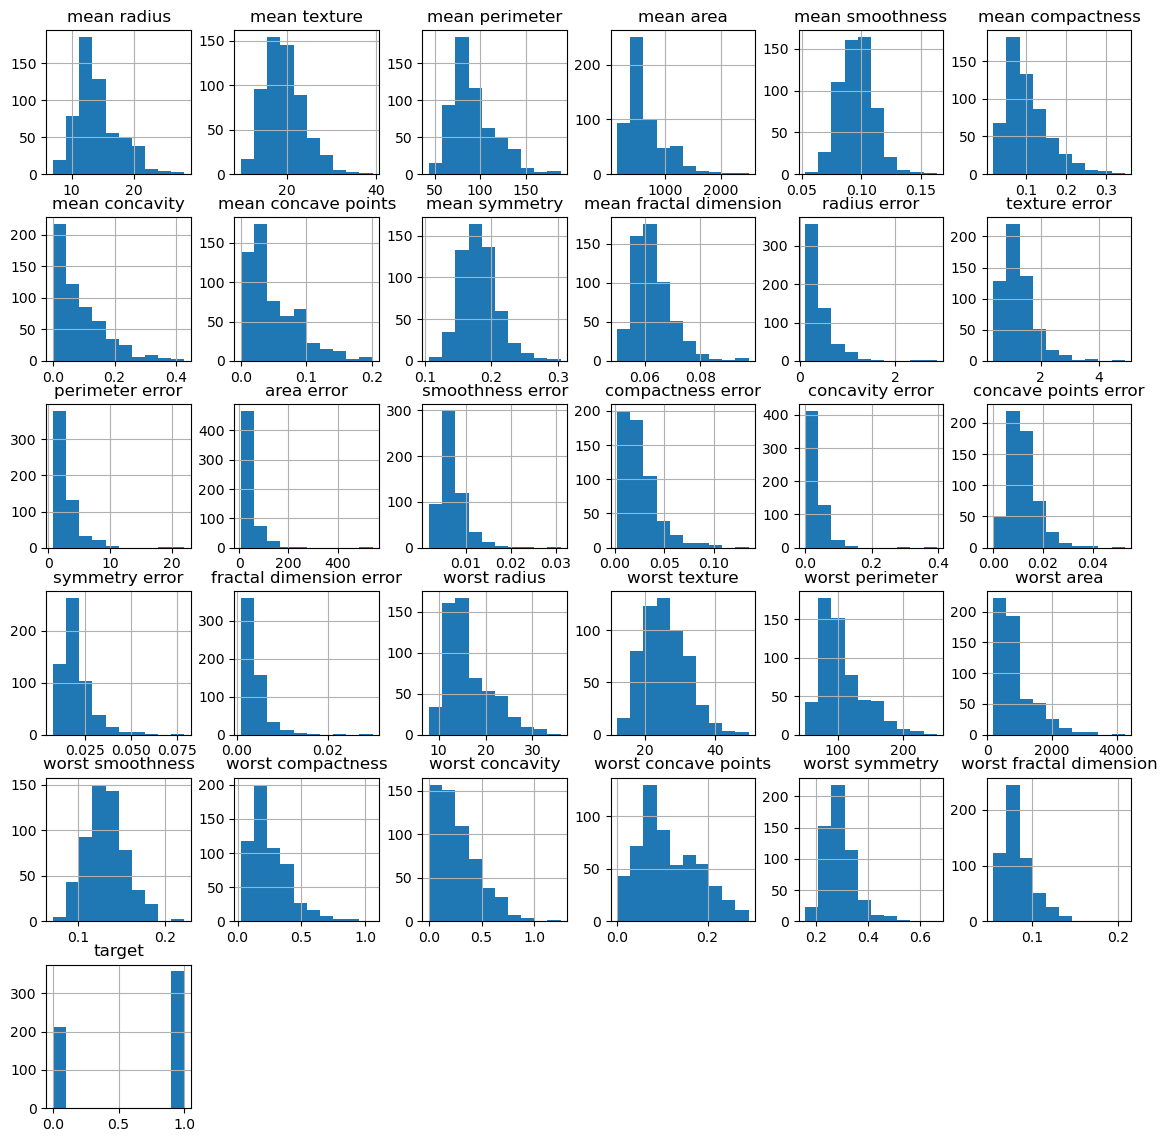

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

bcDf.hist(figsize=(14,14))
plt.show()

- Doesn't look like there are any obvious data quality issues.  
- All numerical, but on different scales, so we'll need to standardize the features.

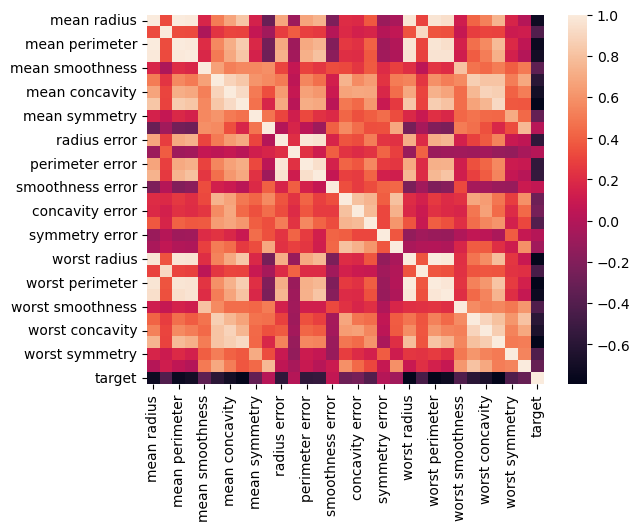

In [7]:
import seaborn as sns

sns.heatmap(bcDf.corr())
plt.show()

- There are a lot of correlated features.  [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) 
- We are going to try using [principal components](https://en.wikipedia.org/wiki/Principal_component_analysis) to extract uncorrelated features.  
    - We'll take more about exactly what this is doing later.  
- We are going to extract 5, which will reduce the feature space from 30 dimensions to 5. (Arbitrary decision)
    - This is technically a suite of hyperparameters we are introducing, but this is a well researched dataset.  

## Pipeline Gameplan
- Split the data into training/test. 
- Create feature processing pipeline. 
    - Standardize features. 
    - Extract 5 PCA components. (arbitrary decision; could evaluate)
- Fit a Logistic Regression model.  
- Evaluate accuracy (relatively balanced dataset so accuracy is okay).  

<img src='./diagrams/06_01.png' style='width: 700px;'>

[Image source: Python Machine Learning 3rd Edition, Raschka](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch06)

#### Benefits of pipelines
- Chains together feature processing and fitting steps.  
- No separate feature transformation fits for test data.  
- Plays nice with many of the more robust evaluation options.  

## Split the data

In [64]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')


Training sample: 455
Test sample: 114


In [65]:
sum(y)/len(y)

0.6274165202108963

In [66]:
sum(y_train)/len(y_train)

0.6395604395604395

In [67]:
sum(y_test)/len(y_test)

0.5789473684210527

## Create our pipeline

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('pca', PCA(n_components=comp)),
        ('model', LogisticRegression(penalty=None))
    ])

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
m

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty=None))])

## Make our predictions on the test set and determine performance estimates

In [69]:
from sklearn.metrics import confusion_matrix

y_test_pred = m.predict(X_test)

print(confusion_matrix(y_test, y_test_pred))

[[42  6]
 [ 0 66]]


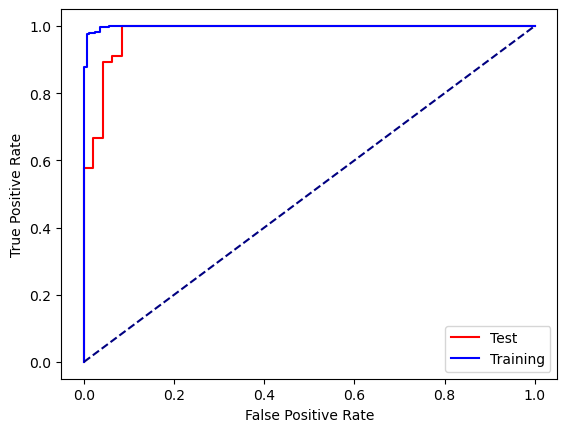

In [70]:
from sklearn.metrics import roc_curve

def generate_probs(X, model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test, m))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train, m))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score

print("training roc score", roc_auc_score(y_train, generate_probs(X_train, m)))
print("test roc score", roc_auc_score(y_test, generate_probs(X_test, m)))

training roc score 0.9985751403905792
test roc score 0.9801136363636364


# Why is our performance estimate potentially flawed?
- How representative is the test dataset?  
- Why did we choose 20% to hold for the test set?  
- Feature sets in our partitions follow the same distribution?  
- Did we try any additional settings or parameter combinations?  
- We don't really have a baseline to compare our results against.  

## What type of variation can we expect in the test data set?

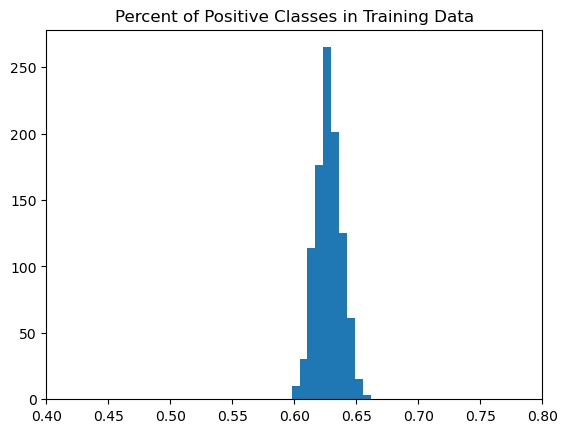

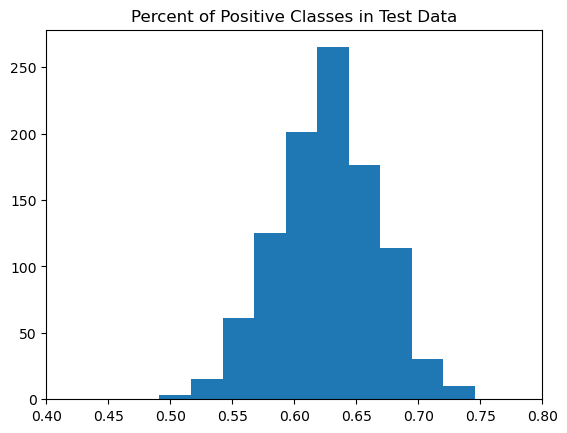

In [72]:
samples = 1000
trainingMeans = []
testMeans = []

i = 0
while i < samples:
    X_train, X_test, y_train, y_test = create_splits(X, y)
    trainingMeans.append(np.mean(y_train))
    testMeans.append(np.mean(y_test))
    i += 1

plt.hist(trainingMeans)
plt.xlim(0.4, 0.8)
plt.title('Percent of Positive Classes in Training Data')
plt.show()

plt.hist(testMeans)
plt.xlim(0.4, 0.8)
plt.title('Percent of Positive Classes in Test Data')
plt.show()

- Smaller dataset will have more vulnerability to sampling issues.  
- What if our data set was bigger?  

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# population for our illustration
population = np.random.binomial(1, 0.5, size=1000000)
population

array([1, 0, 1, ..., 1, 0, 0])

In [77]:
pd.Series(population).value_counts()

1    500618
0    499382
Name: count, dtype: int64

In [78]:
population.mean()

0.500618

#### Let's draw samples at varying sample sizes to see how representative sample means would be from a large distribution.

In [79]:
from collections import defaultdict
reps = 100
sample_sizes = [5, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 100000, 200000]
means = defaultdict(list)

for rep in range(reps):
    for ss in sample_sizes:
        means[ss].append(np.random.choice(a=population, size=ss, replace=False).mean())
        
meansDf = pd.DataFrame.from_dict(means)
meansDf #.head()

,5,10,50,100,250,500,1000,2500,5000,10000,100000,200000
0,0.4,0.8,0.42,0.44,0.500,0.490,0.514,0.5060,0.5002,0.5023,0.50033,0.500875
1,0.0,0.5,0.52,0.55,0.508,0.462,0.512,0.4992,0.5100,0.4991,0.50091,0.500470
2,0.2,0.7,0.54,0.54,0.532,0.482,0.514,0.4816,0.5034,0.4946,0.50221,0.500710
3,0.8,0.5,0.60,0.53,0.472,0.452,0.482,0.4888,0.5020,0.5096,0.50019,0.499535
4,0.2,0.4,0.44,0.51,0.496,0.526,0.488,0.4964,0.4930,0.5030,0.49830,0.501190
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.4,0.3,0.52,0.58,0.496,0.534,0.499,0.4928,0.5082,0.5026,0.50145,0.499705
96,0.0,0.5,0.42,0.54,0.556,0.524,0.499,0.4924,0.4912,0.5003,0.50156,0.501030
97,0.6,0.7,0.62,0.53,0.452,0.496,0.518,0.5096,0.5038,0.4992,0.50071,0.501140
98,0.4,0.3,0.38,0.41,0.544,0.468,0.508,0.5008,0.4964,0.5073,0.50334,0.501405


In [80]:
meansDf.describe().iloc[3:, :]

,5,10,50,100,250,500,1000,2500,5000,10000,100000,200000
min,0.0,0.2,0.34,0.3600,0.420,0.452,0.466,0.4760,0.47440,0.491500,0.496830,0.498040
25%,0.4,0.4,0.44,0.4600,0.484,0.480,0.487,0.4936,0.49715,0.497525,0.499760,0.500136
50%,0.6,0.5,0.50,0.5000,0.500,0.499,0.499,0.5012,0.50150,0.501050,0.500715,0.500777
75%,0.6,0.6,0.54,0.5325,0.521,0.514,0.509,0.5072,0.50645,0.503525,0.501570,0.501290
max,1.0,0.9,0.68,0.6300,0.584,0.552,0.534,0.5284,0.51840,0.512600,0.504790,0.502645


In [81]:
meansDf.quantile(0.50)
plt.plot(meansDf.quantile(0.50))
plt.xscale('log')

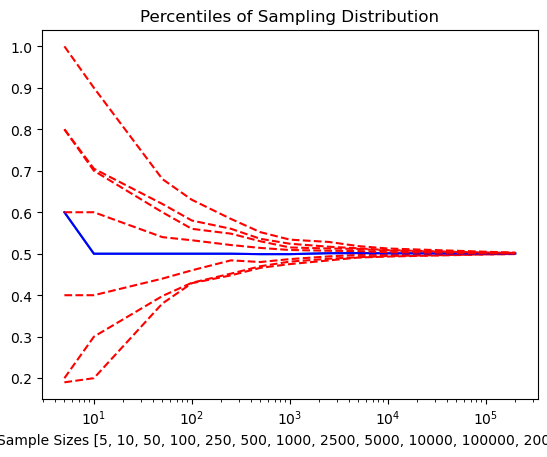

In [82]:
for i in [0.05, 0.1, 0.25, 0.50, 0.75, 0.9, 0.95, 1]:
    if i == 0.5:
        plt.plot(meansDf.quantile(i), '-b')
    else:
        plt.plot(meansDf.quantile(i), '--r')
plt.xscale('log')
plt.title('Percentiles of Sampling Distribution')
plt.xlabel(f'Sample Sizes {sample_sizes}')
plt.show()

- Small samples are going to be much more at risk for sampling variations.  
- It is not advisable to use a simple training/test split for small datasets.  
    - It's very likely your test set won't mirror your training.  
    - Neither may mirror the "population".  
- For larger datasets, choosing a smaller percentage for test can be okay.  
    - The number of samples held will be hopefully very large, and have less risk to sampling variation.  

### Rascha on Choosing an appropriate ratio for partitioning a dataset into training and test dates
From page 124 of *Python Machine Learning 3rd Edition, Raschka*:
> If we are dividing a dataset into training and test datasets, we have to keep in mind that we are withholding valuable information that the learning algorithm could benefit from.<br><br>Thus, we don't want to allocate too much information to the test set.<br><br>However, the smaller the test set, the more inaccurate the estimation of the generalization error.<br><br>Dividing a dataset into training and test datasets is all about balancing this tradeoff.<br><br>...<br><br>Moreover, instead of discarding the allocated test data after model training and evaluation, it is a common practice to retrain a classifier on the entire dataset, as it can improve the predictive performance of our model.

## Strengths
- Quick guage of performance.  
- Okay if looking for quick interpretability.


## Weaknesses
- Prone to overfitting and not ideal for tuning hyperparameters. 
- Many don't partition the training into training and validation, which isn't a good practice.  
- There could be other issues with the splits that affect the comparability and would lead to poor results in the real world. The performance estimate is going to be sensitive to how the partition was done. 

## Other issues to be aware
- Is the historical data representative of the current data generating process?  
- Have there been structure shifts in the data over time? (leakage)  
- Rare event issues and sampling

# Better: Holdout Method
This is for larger datasets, where we don't need to worry about sampling variation risk. We are going to pretend the breast cancer data is "big" enough for this to be a valid approach.

- Split the data into training and test.  
> **Develop and train our models using the training partition and estimate general performance on the test set.**  
**PRETEND THE TEST SET DOESN'T EXIST WHILE MODELING OR PERFORMING PREPROCESSING. IDEAS WHY?**
- Split the training into training and validation.  
> **If we train our models on the entire training dataset, we are going to be at risk for overfitting? Why?** 
- Training data is where we'll be creating models and those will be evaluated on the validation data. The test set is for final validation and check that we didn't overfit on the validation set.

<img src='./diagrams/training-validation-test-data-set.png' style='width: 600px;'>

[Image source: Raschka, Chapter 6, Page 196](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch06)

## Chaining train_test_split

In [83]:
from sklearn.model_selection import train_test_split

def create_holdout_splits(X, y):
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = create_holdout_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Validation sample: {X_val.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 364
Validation sample: 91
Test sample: 114


## Compare and evaluate models
Let's see how the PCA model to a model that uses the full feature set.

### Create pipeline we can use for feature transforms and prediction.
- Might as well check our assumption on using 5 components.

In [84]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(use_pca = False, comp=None):
    if use_pca:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('pca', PCA(n_components=comp)),
             ('model', LogisticRegression(penalty=None))
            ]
        )
    else:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression(penalty=None))
            ]
        )

    return modeling_pipeline

m_rawFeatures = generate_estimates(use_pca=False).fit(X_train, y_train)
print('raw features:', m_rawFeatures)

m_pca_models = {}
for i in range(1,6):
    m_pca_models[i] = generate_estimates(use_pca=True, comp=i).fit(X_train, y_train)
    print(f'pca{i}:', m_pca_models[i])
    
print('Models fitted')

raw features: Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(penalty=None))])
pca1: Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=1)),
                ('model', LogisticRegression(penalty=None))])
pca2: Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression(penalty=None))])
pca3: Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=3)),
                ('model', LogisticRegression(penalty=None))])
pca4: Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=4)),
                ('model', LogisticRegression(penalty=None))])
pca5: Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty=None))])
Models fitted


### Compare confusion matrices

In [85]:
from sklearn.metrics import confusion_matrix

y_val_rawFeatures = m_rawFeatures.predict(X_val)

print('Using raw features:')
print(confusion_matrix(y_val, y_val_rawFeatures))
print('----------------------')
y_val_pca = {}
for i in range(1,6):
    y_val_pca[i] = m_pca_models[i].predict(X_val)
    print(f'Using PCA{i}:')
    print(confusion_matrix(y_val, y_val_pca[i]))

Using raw features:
[[31  3]
 [ 3 54]]
----------------------
Using PCA1:
[[29  5]
 [ 3 54]]
Using PCA2:
[[31  3]
 [ 2 55]]
Using PCA3:
[[32  2]
 [ 1 56]]
Using PCA4:
[[33  1]
 [ 2 55]]
Using PCA5:
[[31  3]
 [ 3 54]]


- Looks like the PCA model performed better and maybe we didn't need all 5 of those components.

### Check the ROC curves

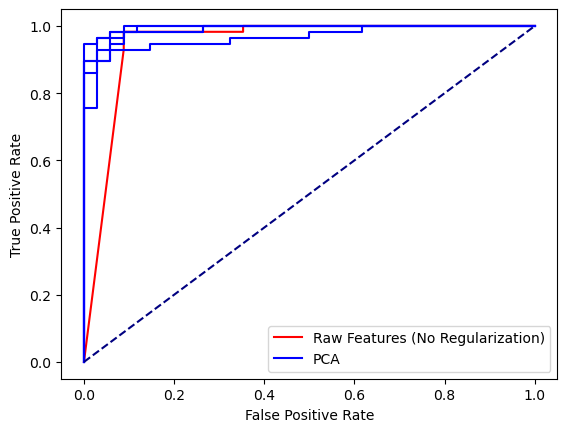

In [86]:
from sklearn.metrics import roc_curve

def generate_probs(X, model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_val_rawFeatures, tpr_val_rawFeatures = generate_roc(y_val,
                                                        generate_probs(X_val, model=m_rawFeatures))


fpr_val_pca = {}
tpr_val_pca = {}
for i in range(1,6):
    fpr_val_pca[i], tpr_val_pca[i] = generate_roc(y_val,
                                          generate_probs(X_val, model=m_pca_models[i]))


plt.plot(fpr_val_rawFeatures, tpr_val_rawFeatures,'-r')
for i in range(1,6):
    plt.plot(fpr_val_pca[i], tpr_val_pca[i],'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Raw Features (No Regularization)','PCA'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

- Looks like the ROC curves overlap themselves for each component.  
- Using PCA performed significantly better in the validation data.  
- Now check to see if it continues in the test data.  


Using raw features:
[[45  3]
 [ 2 64]]
0.9766414141414141


Using PCA1:
[[41  7]
 [ 3 63]]
0.9602272727272728


Using PCA2:
[[42  6]
 [ 3 63]]
0.9861111111111112


Using PCA3:
[[44  4]
 [ 2 64]]
0.9889520202020202


Using PCA4:
[[44  4]
 [ 1 65]]
0.9968434343434343


Using PCA5:
[[46  2]
 [ 1 65]]
0.9958964646464648




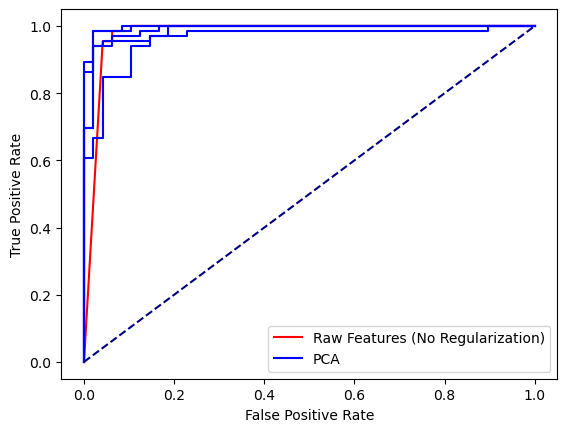

In [88]:
fpr_test_rawFeatures, tpr_test_rawFeatures = generate_roc(y_test,
                                                        generate_probs(X_test, model=m_rawFeatures))
print(f'Using raw features:')
print(confusion_matrix(y_test, m_rawFeatures.predict(X_test)))
print(roc_auc_score(y_test, generate_probs(X_test, m_rawFeatures)))
print('\n')

# create false/true positive rate curves
fpr_test_pca = {}
tpr_test_pca = {}
for i in range(1,6):
    conf_matrix = m_pca_models[i].predict(X_test)
    print(f'Using PCA{i}:')
    print(confusion_matrix(y_test, conf_matrix))
    
    probs = generate_probs(X_test, model=m_pca_models[i])
    fpr_test_pca[i], tpr_test_pca[i] = generate_roc(y_test, probs)
    print(roc_auc_score(y_test, probs))
    
    print('\n')

# plot the ROC curve
plt.plot(fpr_test_rawFeatures, tpr_test_rawFeatures,'-r')

for i in range(1,6):
    plt.plot(fpr_test_pca[i], tpr_test_pca[i],'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Raw Features (No Regularization)','PCA'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

- Looks like the performance was consistent with what we observed in the validation dataset.
- Which model should be choose in this case?

# Cross-validation - Best option for small datasets

<img src='./diagrams/06_03.png' style='width: 600px;'>

[Image source: Python Machine Learning 3rd Edition, Figure 6.3](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch06)

#### Basic mechanics:  
- Split the data into training and test. 
- The training data will be divided into *k* folds.  
    - Each folder will use a different partition for the validation data.  
- The models will be run on each fold.  
- Performance estimate will be taken with the median or mean score.  
    - Need to define what metric you are optimizing toward.  

You could do this with a loop, but scikit-learn has this built-in.

Let's get our data again:

In [89]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 455
Test sample: 114


#### Set-up the same pipeline as before and run it through the function
Things to consider:  
- Need an estimator (classifer/regression), which a pipeline satisfies if the last step is a model.  
- This accepts multiple metrics, so you'll need to determine which one is most appropriate.

[List of metrics accepted](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('pca', PCA(n_components=5)),
        ('model', LogisticRegression(penalty=None))
    ])

    return modeling_pipeline

from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, X_train, y_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
cv_results

{'fit_time': array([0.01787806, 0.00196099, 0.00139093, 0.00140381, 0.00183725]),
 'score_time': array([0.00348282, 0.00265193, 0.0021441 , 0.00231695, 0.00235391]),
 'test_accuracy': array([0.98901099, 0.97802198, 0.96703297, 0.95604396, 0.97802198]),
 'test_recall': array([0.98275862, 0.98305085, 1.        , 0.94915254, 0.98305085]),
 'test_precision': array([1.        , 0.98305085, 0.9516129 , 0.98245614, 0.98305085]),
 'test_f1_macro': array([0.98818949, 0.97590042, 0.96301314, 0.95245559, 0.97590042]),
 'test_roc_auc': array([1.        , 0.99470339, 0.98411017, 0.99523305, 0.98252119])}

#### What does this return?
- How long it took the model to fit. This will be more important with larger datasets and more complex models.  
- How long it took the model to score the validation set in the fold.  
- The metrics.  

It returns an array so you can look at the distribution and/or central tendency of the model.

In [91]:
for k in cv_results.keys():
    print(f'{k}: {cv_results[k].mean():.4f} (+/- {cv_results[k].std():.4f})')

fit_time: 0.0049 (+/- 0.0065)
score_time: 0.0026 (+/- 0.0005)
test_accuracy: 0.9736 (+/- 0.0112)
test_recall: 0.9796 (+/- 0.0166)
test_precision: 0.9800 (+/- 0.0157)
test_f1_macro: 0.9711 (+/- 0.0123)
test_roc_auc: 0.9913 (+/- 0.0068)


## Solved the sampling variation issue, now can compare between models with better certainty


In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(use_pca = False, comp=None):
    if use_pca:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
            ('pca', PCA(n_components=5)),
            ('model', LogisticRegression(penalty=None))
        ])
    else:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
            ('model', LogisticRegression())
        ])

    return modeling_pipeline

from sklearn.model_selection import cross_validate

pca_clf = generate_estimates(use_pca=True, comp=5)
nopca_clf = generate_estimates()

pca_cv_results = cross_validate(pca_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
pca_cv_results

{'fit_time': array([0.01983619, 0.00173593, 0.00155902, 0.00187778, 0.00151229]),
 'score_time': array([0.00291419, 0.00246215, 0.002635  , 0.00273418, 0.00223374]),
 'test_accuracy': array([0.98901099, 0.97802198, 0.96703297, 0.95604396, 0.97802198]),
 'test_recall': array([0.98275862, 0.98305085, 1.        , 0.94915254, 0.98305085]),
 'test_precision': array([1.        , 0.98305085, 0.9516129 , 0.98245614, 0.98305085]),
 'test_f1_macro': array([0.98818949, 0.97590042, 0.96301314, 0.95245559, 0.97590042]),
 'test_roc_auc': array([1.        , 0.99470339, 0.98411017, 0.99523305, 0.98252119])}

In [93]:
nopca_cv_results = cross_validate(nopca_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
nopca_cv_results

{'fit_time': array([0.02458978, 0.00420213, 0.00184703, 0.00298715, 0.00343204]),
 'score_time': array([0.00286198, 0.00638294, 0.00202107, 0.00570679, 0.00184584]),
 'test_accuracy': array([0.98901099, 0.98901099, 0.96703297, 0.98901099, 0.97802198]),
 'test_recall': array([0.98275862, 1.        , 1.        , 1.        , 1.        ]),
 'test_precision': array([1.        , 0.98333333, 0.9516129 , 0.98333333, 0.96721311]),
 'test_f1_macro': array([0.98818949, 0.98786181, 0.96301314, 0.98786181, 0.97553763]),
 'test_roc_auc': array([1.        , 0.99788136, 0.98305085, 0.99629237, 0.99894068])}

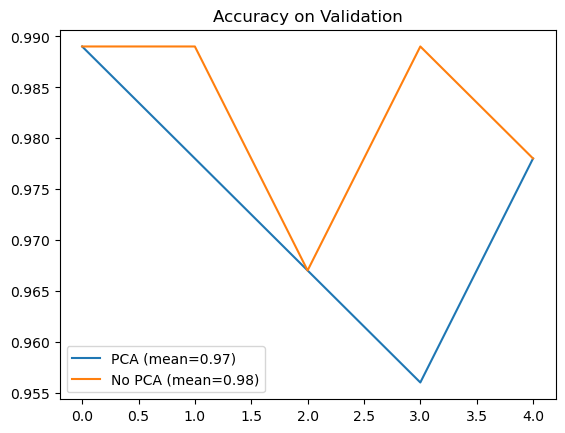

In [94]:
a1 = pca_cv_results['test_accuracy'].mean()
a2 = nopca_cv_results['test_accuracy'].mean()

plt.plot(pca_cv_results['test_accuracy'])
plt.plot(nopca_cv_results['test_accuracy'])
plt.legend([f'PCA (mean={a1:.2f})',f'No PCA (mean={a2:.2f})'])
plt.title('Accuracy on Validation')
plt.show()

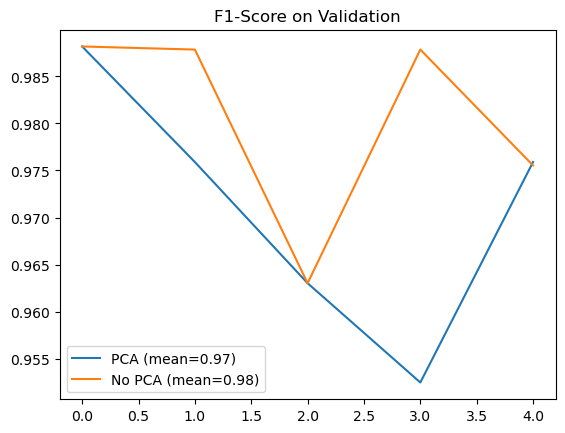

In [95]:
a1 = pca_cv_results['test_f1_macro'].mean()
a2 = nopca_cv_results['test_f1_macro'].mean()

plt.plot(pca_cv_results['test_f1_macro'])
plt.plot(nopca_cv_results['test_f1_macro'])
plt.legend([f'PCA (mean={a1:.2f})',f'No PCA (mean={a2:.2f})'])
plt.title('F1-Score on Validation')
plt.show()

> What looks like the better option?

## Cross-validation not just for classification tasks
- Same concept for regression, the scoring metrics will be different.  
- Recall our California housing dataset:

In [96]:
from sklearn.datasets import fetch_california_housing

ch = fetch_california_housing()
ch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [97]:
X_housing = pd.DataFrame(ch['data'], columns=list(ch['feature_names']))
X_housing.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [98]:
y_housing = ch['target']

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

def generate_estimates():
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
        ('model', LinearRegression())
    ])

    return modeling_pipeline

from sklearn.model_selection import cross_validate

reg = generate_estimates()
cv_results = cross_validate(reg, X_housing, y_housing, scoring=['r2'], cv=10)
cv_results

{'fit_time': array([0.01071382, 0.00317287, 0.00994897, 0.00361609, 0.00307202,
        0.00218129, 0.00201011, 0.00203228, 0.00193715, 0.00201702]),
 'score_time': array([0.01019406, 0.00257826, 0.00130606, 0.00439405, 0.00226998,
        0.00068498, 0.00053787, 0.00037193, 0.00039721, 0.00126505]),
 'test_r2': array([0.48254494, 0.61416063, 0.42274892, 0.48178521, 0.55705986,
        0.5412919 , 0.47496038, 0.45844938, 0.48177943, 0.59528796])}

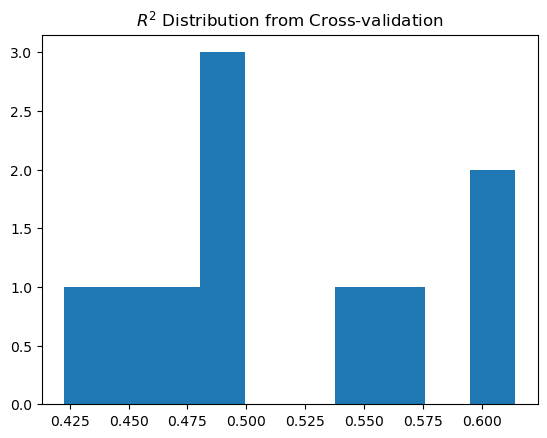

In [99]:
plt.hist(cv_results['test_r2'])
plt.title('$R^2$ Distribution from Cross-validation')
plt.show()

> Looks like the parameters being learned are highly influenced by the training data for California housing. (overfit)

## But what about setting hyperparameters?
How to determine how many components we may want to use?

### General comments on hyperparameters:
- These aren't learned by the model, they are selected by the analyst.  
- You need to learn the best combination by experimenting across the search space.  
- If you have a large dataset you can evaluate these in the validation dataset.  
- If you have a smaller dataset you can evaluate these using cross validation.  

Consider how large your search space can be:
- For regularization, the $C$ parameter in Logistic Regression could span from near zero to approaching infinity.  
- For hyperparameters with that type of bounds, you'll likely want to start with a handful of values that are spacing on a logarithmic scale, e.g. $C \in (0.001, 0.01, 0.1, 1, 10, 100, 1000)$.  
- If you have other hyperparameters, e.g., the specific solver for Logistic Regression, you'll need to evaulate each solver at each regularization level:  

$$\begin{equation*}
PE_{solver,C} = 
\begin{pmatrix}
PE_{newton-cg,0.001} & PE_{newton-cg,0.01} & \cdots & PE_{newton-cg,1000} \\
PE_{lbfgs,0.001} & PE_{lbfgs,0.01} & \cdots & PE_{lbfgs,1000} \\
\vdots  & \vdots  & \ddots & \vdots  \\
PE_{saga,0.001} & PE_{saga,0.01} & \cdots & PE_{saga,1000} 
\end{pmatrix}
\end{equation*}
$$

- So you if you have 7 different regularization strengths and 5 different solvers, you'll be running $7*5=35$ models. If you use 10 cross-validation folds, that will be 350 models (hence smaller datasets for CV).  
- And making it more complicated, you may have multiple metrics (e.g., precision vs. recall).  

> When you find the "best" set of hyperparameters, you'll want to explore the nearby space in more detail.

- If you find $C=10$ as the "best", you might want to try another round with $C \in (7,8,9,10,11,12,13)$.  

> Finding the "perfect" set of hyperparameters is likely impossible. The search space is generally going to be too large.

- Random search of Bayesian hyperparameter optimization can help in those situations.
- In random search you'll provide a distribution of values instead of discrete values.  
- Optimization-based searches will try to make intelligent choices based on past explorations.  

# Validation Curves
- You can use these to visualize seeing the differences in different parameters.  
- scikit-learn uses a varient on k-fold cross-validation to plot the distribution of metrics for different parameter values.  
- We can plot the range of accuracies we observe for many folds across different settings of the parameter.

This is using the breast cancer dataset. We are going to vary $C$ to see its effect. Some of this code is borrowed from page 205-206 of Python Machine Learning 3rd Edition.

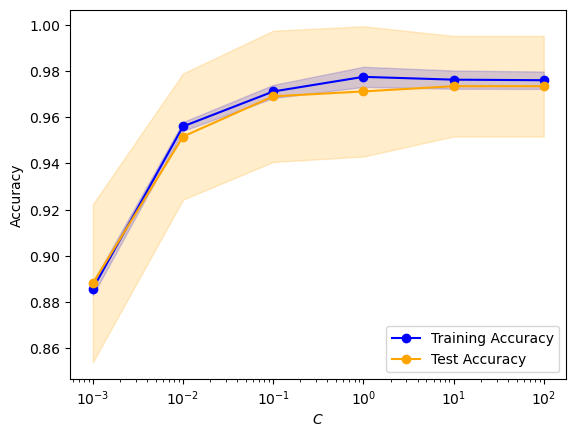

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

lg_pipe = modeling_pipeline = Pipeline([
         ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2'))
        ]
    )

from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

training_scores, test_scores = validation_curve(estimator=lg_pipe, X=X_train, y=y_train,
                                               param_name='logreg__C', 
                                               param_range=param_range, 
                                               cv=10)

train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', marker='o', label='Test Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.xscale('log')
plt.xlabel('$C$')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

> What does this suggest as a parameter for $C$?

# Grid Search

<img src='./diagrams/grid_search_workflow.png' style='width: 500px;'>

[Image source](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

Examples:
- [Digits dataset](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)  
- [Text extraction](https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py)  
- [Multiple metric example](https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py)

On the breast cancer dataset:

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )

from sklearn.model_selection import GridSearchCV

# param_grid = [
#   {
#     'logreg__penalty': ['l1', 'l2'],
#     'logreg__C': [1, 10, 100, 1000], 
#     'pca__n_components': [1,2,3,4,5,10,15]
#   }
#  ]

param_grid = [
  {
    'logreg__penalty': ['l2', 'l1'],
    'logreg__C': [ 1, 10], 
    'pca__n_components': [ 11, 12 , 13]
  }
 ]

gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)

> This outputs a dictionary with the results:

In [113]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_logreg__penalty', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

> And a series of summarys for the best fit

In [114]:
gcv_results.best_score_

0.989010989010989

In [115]:
gcv_results.best_params_

{'logreg__C': 1, 'logreg__penalty': 'l2', 'pca__n_components': 12}

In [111]:
gcv_results.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=12)),
                ('logreg', LogisticRegression(C=1, solver='liblinear'))])

> After you find the "best" hyperparameters, you'll retrain your training data using those and then evaluate the test data using that model. There's an option in GridSearchCV to do this automatically.

You could use multiple estimators, but it'll get a little complicated, see below for example:

```python
   from sklearn.base import BaseEstimator
    from sklearn.model_selection import GridSearchCV
    
    class DummyEstimator(BaseEstimator):
        def fit(self): pass
        def score(self): pass
        
    # Create a pipeline
    pipe = Pipeline([('clf', DummyEstimator())]) # Placeholder Estimator
    
    # Candidate learning algorithms and their hyperparameters
    search_space = [{'clf': [LogisticRegression()], # Actual Estimator
                     'clf__penalty': ['l1', 'l2'],
                     'clf__C': np.logspace(0, 4, 10)},
                    
                    {'clf': [DecisionTreeClassifier()],  # Actual Estimator
                     'clf__criterion': ['gini', 'entropy']}]
    
    
    # Create grid search 
    gs = GridSearchCV(pipe, search_space)
```

# Evaluation Wrap-up

<img src='./diagrams/model-eval-conclusions.jpg' style='width: 600px;'>

[Image source: *Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning, Raschka*](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)

# Unbalanced Classes

Consider the credit from last week:

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

credit = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/Default.csv', index_col=0)
credit.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


> Remember we had interesting distributions with our numerical variables.

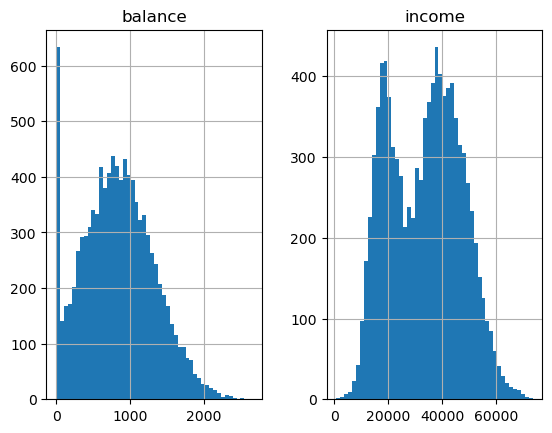

In [117]:
credit.hist(bins=50)
plt.show()

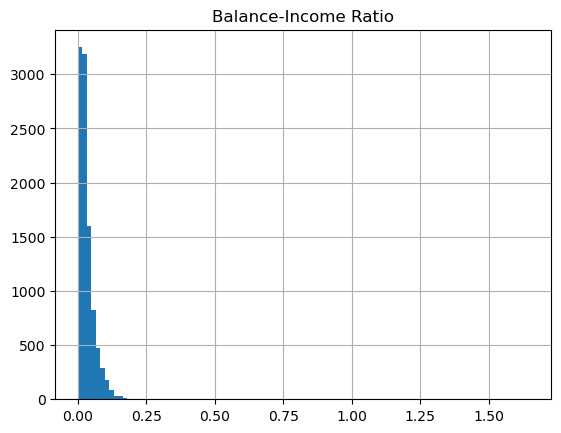

In [118]:
credit['balance2income'] = credit['balance']/credit['income']

credit['balance2income'].hist(bins=100)
plt.title('Balance-Income Ratio')
plt.show()

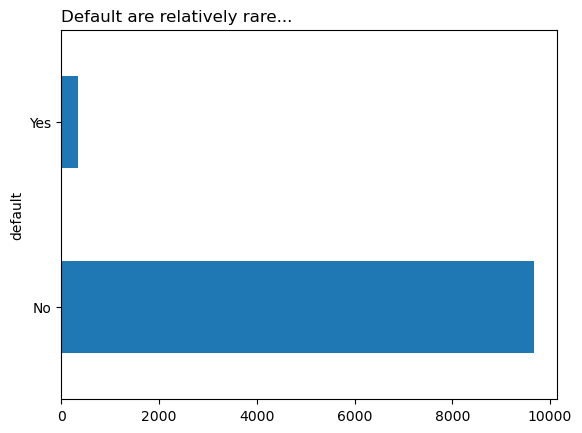

In [119]:
credit['default'].value_counts().plot.barh()
plt.title('Default are relatively rare...', loc='left')
plt.show()

### Recall we didn't have the best results with a straightforward logistic regression

> Will try to add some additional features to capture some of the mixture distributions and the truncation of the credit balance.

We can add these prior to processing since they are only considering the example row.

In [120]:
credit['balance_student_int'] = np.where(credit['student']=='Yes', credit['balance'], 0)
credit['income_student_int'] = np.where(credit['student']=='Yes', credit['income'], 0)
credit['zero_balance'] = np.where(credit['balance'] == 0, 'Yes', 'No')

credit.head()

,default,student,balance,income,balance2income,balance_student_int,income_student_int,zero_balance
1,No,No,729.526495,44361.625074,0.016445,0.000000,0.0000,No
2,No,Yes,817.180407,12106.134700,0.067501,817.180407,12106.1347,No
3,No,No,1073.549164,31767.138947,0.033794,0.000000,0.0000,No
4,No,No,529.250605,35704.493935,0.014823,0.000000,0.0000,No
5,No,No,785.655883,38463.495879,0.020426,0.000000,0.0000,No


### We'll do Cross Validation, but still need to split the data into training and test

In [121]:
from sklearn.model_selection import train_test_split

creditFeatures = [x for x in credit.columns if x != 'default']
y = np.where(credit['default'] == 'Yes', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(credit[creditFeatures], y, test_size=0.20)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 8,000
Test examples: 2,000


In [123]:
y_train.mean(), y_test.mean()

(0.03275, 0.0355)

#### Create a modeling pipeline

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

nums = ['balance2income', 'balance', 'income', 'balance_student_int', 'income_student_int']
ohes = ['student', 'zero_balance']

processing_pipeline = ColumnTransformer(transformers=[
    ('numscaling', StandardScaler(), nums),
    ('dummys', OneHotEncoder(drop='first'), ohes)]
)

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('logreg', LogisticRegression())]
)

### Run a baseline model

In [125]:
creditbase = modeling_pipeline.fit(X_train, y_train)
base_p = creditbase.predict(X_test)
base_pr = creditbase.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, base_p))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1929
           1       0.74      0.28      0.41        71

    accuracy                           0.97      2000
   macro avg       0.86      0.64      0.70      2000
weighted avg       0.97      0.97      0.96      2000



### Define search space
> We'll try using weights to try to account for the unbalanced distribution of defaults.

In [126]:
param_grid = [
  {
    'logreg__class_weight': [None, 'balanced'], 
   'logreg__C':[0.01, 0.1, 1, 10, 100]}
 ]

### Run the experiment
> Let's look for high-recall, since default could be very expensive.

In [127]:
gcv_results = GridSearchCV(estimator=modeling_pipeline, param_grid=param_grid, scoring='recall', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

In [128]:
gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('numscaling',
                                                  StandardScaler(),
                                                  ['balance2income', 'balance',
                                                   'income',
                                                   'balance_student_int',
                                                   'income_student_int']),
                                                 ('dummys',
                                                  OneHotEncoder(drop='first'),
                                                  ['student',
                                                   'zero_balance'])])),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced'))])

In [129]:
gcv_results.best_params_

{'logreg__C': 0.01, 'logreg__class_weight': 'balanced'}

### Determine how this performs on the test data

In [130]:
y_testp = gcv_results.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1929
           1       0.20      0.92      0.32        71

    accuracy                           0.86      2000
   macro avg       0.60      0.89      0.62      2000
weighted avg       0.97      0.86      0.90      2000



### Did weighting help?
- Recall went from 0.36 to 0.92 for detecting the default.  
- Precision went from 0.69 to 0.17 for detecting the default.  
> We detected more of the defaults, with the trade-off of more false-positives. Depending what the cost of those is - which you'd need to talk with a SME about - this might be a preferred model.

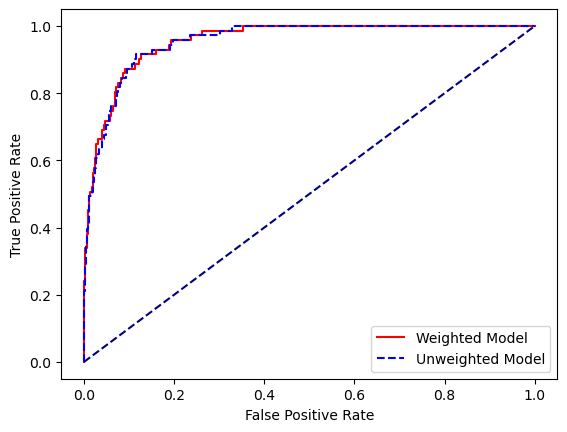

In [131]:
from sklearn.metrics import roc_curve

y_testpr = gcv_results.predict_proba(X_test)

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_wgt, tpr_wgt = generate_roc(y_test, y_testpr[:,1])
fpr_base, tpr_base = generate_roc(y_test, base_pr[:,1])

plt.plot(fpr_wgt, tpr_wgt,'-r')
plt.plot(fpr_base, tpr_base,'--b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Weighted Model','Unweighted Model'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

> Weighted model has essentially the same ROC curve as the unweighted model in this case.

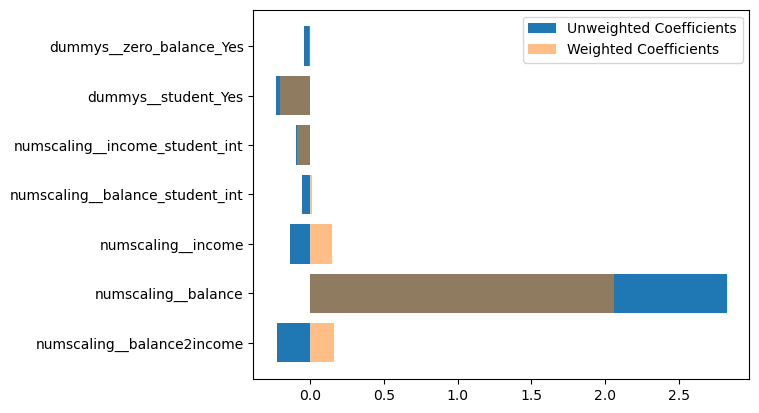

In [132]:
plt.barh(creditbase['data_processing'].get_feature_names_out(),creditbase['logreg'].coef_[0])
plt.barh(creditbase['data_processing'].get_feature_names_out(), gcv_results.best_estimator_['logreg'].coef_[0], alpha=0.5)
plt.legend(['Unweighted Coefficients', 'Weighted Coefficients'])
plt.show()

## Resampling and Generating new data

### Resampling. 
If weighting isn't supporting, you can resample the training data.  
- This gets complicated since you want to evaluate based on the original distribution.  
- GridSearchCV won't support this well since the validation dataset is split from the training data.  
- You could use loops for this, but you need to be careful to make sure the performance estimate is based on the `actual` distribution.

### Generating new data.  
- The more complicated, probably less ROI option, is generating new data.  
-  Synthetic Minority Over-sampling Technique(SMOTE) is a popular technique, if needed. [See this paper for a description](https://arxiv.org/pdf/1106.1813.pdf)

> There is another library called `imbalanced-learn` that has methods specifically designed for these types of problems as well.

# Using classifiers to determine dataset bias 
- We shouldn't be able to predict whether an example in the training or test set.

In [134]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

iX_train, iX_test, iy_train, iy_test = train_test_split(iris['data'], 
                                                        iris['target'], 
                                                        shuffle=True)

Creating a new label, whether included in the training or test set and that will be our new target.

In [135]:
inTraining = np.ones((iX_train.shape[0], 1))
inTest = np.zeros((iX_test.shape[0], 1))

irisTarget = np.append(inTraining, inTest, axis=0).reshape(-1)
irisTraining = np.append(iX_train, iX_test, axis=0)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight='balanced')
clf = clf.fit(irisTraining, irisTarget)
preds = clf.predict(irisTraining)

from sklearn.metrics import confusion_matrix
confusion_matrix(irisTarget, preds)

array([[19, 19],
       [42, 70]])

In [136]:
from sklearn.dummy import DummyClassifier

dumdum = DummyClassifier(strategy='uniform')
dumdum = dumdum.fit(irisTraining, irisTarget)
dumPreds = dumdum.predict(irisTraining)

confusion_matrix(irisTarget, dumPreds)

array([[23, 15],
       [47, 65]])

Those are pretty close, so we would have confidence the test and training data is nearly identical if we were making a classifier.

# Readings
[Raschkas's Lecture](https://github.com/rasbt/stat479-machine-learning-fs19/blob/master/11_eval4-algo/11-eval4-algo__slides.pdf)
<br>[Full paper: Model Evaluation, Model Selection, and Algorithm Selection in Machine Learning, Raschka](https://arxiv.org/abs/1811.12808)
<br>[Evaluation: From Precision, Recall and F-Factor to ROC, Informedness, Markedness & Correlation](https://arxiv.org/abs/2010.16061)